***
# Wifey Macro Indicators
***


https://twitter.com/WifeyAlpha/status/1565058274294104066?s=20&t=_NBqg1dX9Wfh2GHltpk9Tw

This thread will cover 23 macroeconomic indicators that are helpful for measuring

Consumption, Investment, Government & Net Exports

**GDP = C+I+G+NX**

The Indicators covered are;

#### CONSUMPTION (C)

* Automobile Sales
* Chain Store Sales
* Consumer Sentiment
* Existing Home Sales
* Underemployment or Slack

#### INVESTMENT (I)

* Book-to-Bill Ratio
* Copper Price
* Durable Goods Orders 
* Housing Permits and Starts
* Industrial Production and Capcity Utilization
* Institute For Supply Management (ISM) Manufacturing Survey
* Institute For Supply Management (ISM) Non-Manufacturing Survey
* JoC-ECRI Industrial Price Index 
* London Metal Exchange Inventories
* Personal Saving Rate
* Unit Labor Costs

#### GOVERNMENT (G)

* Federal Government Budget Deficits and the National Debt

#### NET EXPORTS (NX)

* Baltic Dry Index
* Big Mac Index
* Current Account Deficit
* Oil Inventories
* Tankan Survey
* TIC Data

In [1]:
import pandas_datareader as pdr # access fred
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import requests # data from api
from datetime import datetime
import matplotlib.pyplot as plt

# resize charts:
plt.rcParams['figure.figsize']=[16,6]

## CONSUMPTION (C)

### 1) Automobile Sales

Leading into Recessions, Coincident with Lagging Recoveries (also see ISM Manufacturing Survey)

Auto sales figures are released on the first business day of each month. Data covers last month’s sales.
See Bureau for Transportation Statistics http://btw.gov/publications/national_transportation_statistics/
GM, Ford, Chrysler, Hyundai and Toyota 

Look for decreases in new automobile sales and leases
People fear of future employment

Avoid equities and and increase US Treasury bills 

Risk level: medium

link: https://data.bts.gov/stories/s/Monthly-Transportation-Statistics/m9eb-yevh#motor-vehicle-sales

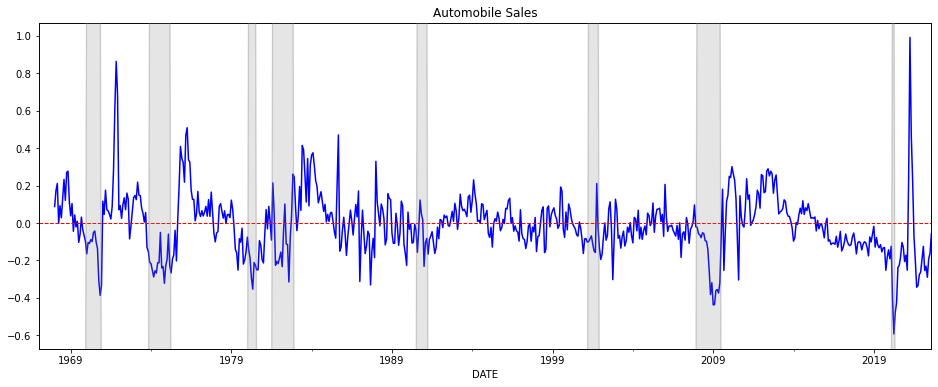

In [2]:
# Save API key in a variable
fred_api_key = '5ccedb95e2418de2e5b7bae928c4e406'

# Create a list of the necessary tickers
tickers = ['DAUTOSAAR', 'USREC']

# Download data from fred API
df = pdr.DataReader(tickers, 'fred', start='1967-01-01') 
df['DAUTOSAAR'] = df['DAUTOSAAR'].pct_change(12)

# Save copy for composite:

df1 = df[['DAUTOSAAR']]

# Create Chart
fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()
df['DAUTOSAAR'].plot(kind='line', stacked=False, ax=ax0, color='blue')
df['USREC'].plot(kind='area', secondary_y=True, ax=ax1, alpha=.2, color='grey')
ax0.axhline(0,color='r',ls='--', label="0", lw=1)
plt.ylim(ymin=0.2, ymax=0.8)
plt.axis('off')
plt.title("Automobile Sales")
plt.ylabel("Nam")
plt.show()
plt.close()

### 2) CHAIN STORE SALES - coincident 

Monthly same-store-sales data on first Thursday of the month. Weekly data from ICSC and Red Book data on Tuesday mornings.

Available on many publicly traded retailers’ websites / The Johnson Redbook Index http://redbookresearch.com / Ken Perkins

Increases (declines) in year-over-year same-store growth as well as month-to-month increases.

Stores are doing well (struggled)

Buy (sell) as expectations of year-over-year same stores sales improved (degrade)

Risk Level: Medium

https://www.investing.com/economic-calendar/redbook-911#:~:text=The%20Redbook%20Index%20is%20a,than%20expected%20number%20as%20negative.

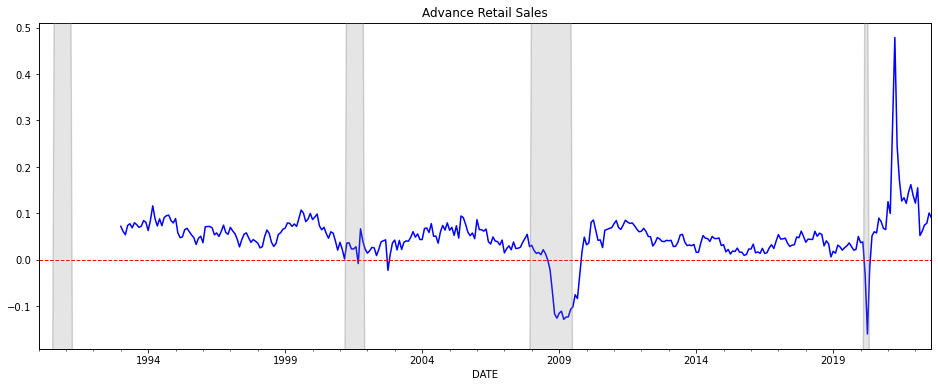

In [3]:
# Create a list of the necessary tickers
tickers = ['RSXFS', 'USREC']

# Download data from fred API
df = pdr.DataReader(tickers, 'fred', start='1990-01-01') 
df['RSXFS'] = df['RSXFS'].pct_change(12)

# Save copy for composite
df2 = df[['RSXFS']]

# Create Chart
fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()
df['RSXFS'].plot(kind='line', stacked=False, ax=ax0, color='blue')
df['USREC'].plot(kind='area', secondary_y=True, ax=ax1, alpha=.2, color='grey')
ax0.axhline(0,color='r',ls='--', label="0", lw=1)
plt.ylim(ymin=0.2, ymax=0.8)
plt.axis('off')
plt.title("Advance Retail Sales")
plt.ylabel("Nam")
plt.show()
plt.close()

In [4]:
df = pd.read_csv('downloads/Redbook.csv', parse_dates=True, index_col=0)

In [5]:
# Download data from investing.com

from bs4 import BeautifulSoup

url = 'https://www.investing.com/economic-calendar/redbook-911'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
table1 = soup.find('table', id='eventHistoryTable911')
headers = []
for i in table1.find_all('th'):
  title = i.text
  headers.append(title)

mydata = pd.DataFrame(columns = headers)
table_rows = table1.find_all('tr')

for j in table1.find_all('tr')[1:]:
  row_data = j.find_all('td')
  row = [i.text for i in row_data]
  length = len(mydata)
  mydata.loc[length] = row

In [6]:
# Format downloaded data:

mydata.set_index('Release Date', inplace=True)
mydata.index = mydata.index.str.replace(r"\(.*?\)", "", regex=True)
mydata.index = pd.to_datetime(mydata.index)
mydata.index.names = ['DATE']
mydata.drop(index=mydata.index[0], axis=0, inplace=True)
mydata.drop(mydata.columns[[0,2,3]], axis=1, inplace=True)
mydata['Actual'] = mydata['Actual'].str.rstrip("%").astype(float) / 100
mydata = mydata.sort_index(ascending=True)

In [7]:
# Merge 2 dataframes to get latest data and save new excel: 

df_update = mydata.loc[(df.index[-1] + pd.offsets.Day(1)):]
df = df.append(df_update)
df.drop(df.columns[[1]], axis=1, inplace=True)
df.to_csv('downloads/Redbook.csv')

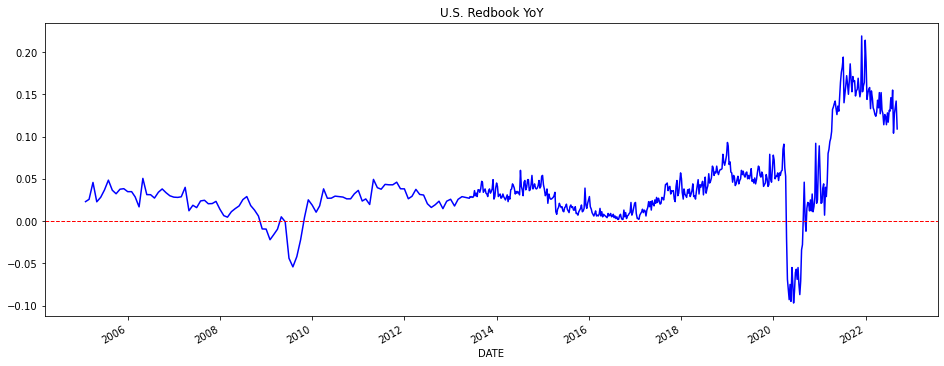

In [8]:
# Download data from fred API
df_rec = pdr.DataReader('USREC', 'fred', start=df.index[0]) 

# Save a copy for composite
df2_a = df.resample('M').mean()
df2_a.index = df2_a.index + pd.offsets.MonthBegin(1)

# Create Chart
fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()
df['Actual'].plot(kind='line', stacked=False, ax=ax0, color='blue')
#df_rec['USREC'].plot(kind='area', secondary_y=True, ax=ax1, alpha=.2, color='grey')
ax0.axhline(0,color='r',ls='--', label="0", lw=1)
plt.ylim(ymin=0.2, ymax=0.8)
plt.axis('off')
plt.title("U.S. Redbook YoY")
plt.ylabel("Nam")
plt.show()
plt.close()

### 3) CONSUMER SENTIMENT - Leading

10am ET on last Tuesday of the month look for Conference Board Consumer Confidence data. Michigan Sentiment information on second Friday of the month.

FRED database - St. Louis Fed for Michigan Consumer Sentiment data

Conference Board information http://conference-board.org 

Increases (decreases) in consumer sentiment over months

Consumers feel exuberant (cautious) 

Buy (short) retail stocks, starting (ending) w/ nondiscretionary items & ending (starting) w/ discretionary

Risk Level: Low

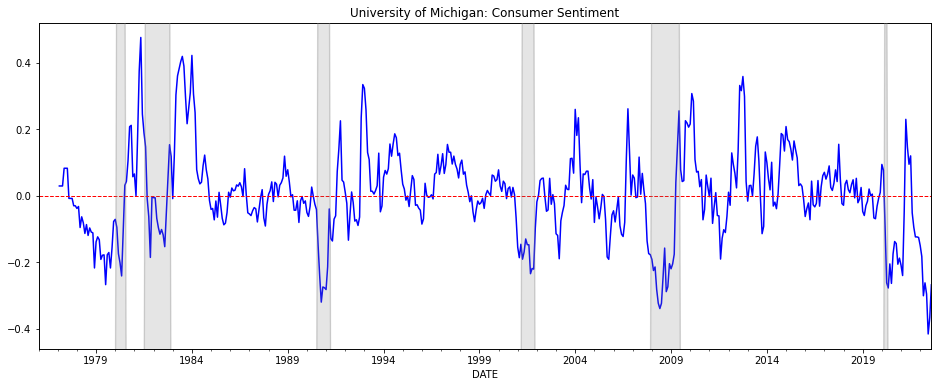

In [9]:
# Create a list of the necessary tickers
tickers = ['UMCSENT', 'USREC']

# Download data from fred API
df = pdr.DataReader(tickers, 'fred', start='1976-01-01') 
df.iloc[:, 0] = df.iloc[:, 0].pct_change(12)

# Save copy for composite:

df3 = df[['UMCSENT']]

# Create Chart
fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()
df.iloc[:, 0].plot(kind='line', stacked=False, ax=ax0, color='blue')
df['USREC'].plot(kind='area', secondary_y=True, ax=ax1, alpha=.2, color='grey')
ax0.axhline(0,color='r',ls='--', label="0", lw=1)
plt.ylim(ymin=0.2, ymax=0.8)
plt.axis('off')
plt.title("University of Michigan: Consumer Sentiment")
plt.ylabel("Nam")
plt.show()
plt.close()

### 4) EXISTING HOME SALES - Leading (also see New Home Sales & Copper Price)

Existing home sales data is published at 10am ET around 25th day of the month 

National Association of Realtors http://realtor.org/research/research/ehsdata  

Pending home sales data provide clues about activity in future.

Increases (decreases) in existing home sales and decreases (increases) in inventory levels measured in months of availability.

The economy is likely looking up (heading for the depths of hades)

Housing looks good (bad) buy stocks (buy US T bills & bonds)

Risk level: Medium

In [10]:
df = pd.read_csv('downloads/Existing_Home_Sales.csv', parse_dates=True, index_col=0)

In [11]:
# Download data from investing.com

from bs4 import BeautifulSoup

url = 'https://www.investing.com/economic-calendar/existing-home-sales-99'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
table1 = soup.find('table', id='eventHistoryTable99')
headers = []
for i in table1.find_all('th'):
  title = i.text
  headers.append(title)

mydata = pd.DataFrame(columns = headers)
table_rows = table1.find_all('tr')

for j in table1.find_all('tr')[1:]:
  row_data = j.find_all('td')
  row = [i.text for i in row_data]
  length = len(mydata)
  mydata.loc[length] = row

In [12]:
# Format dataframe:

mydata.set_index('Release Date', inplace=True)
mydata.index = mydata.index.str.replace(r"\(.*?\)", "", regex=True)
mydata.index = pd.to_datetime(mydata.index)
mydata.index = mydata.index + pd.offsets.MonthBegin(-1)
mydata.index.names = ['DATE']
mydata = mydata.replace({'M':''}, regex=True)
mydata['data'] = mydata['Previous'].shift(1)
mydata['EHS'] = np.where(mydata['data'].isnull(), mydata['Actual'], mydata['data'])
mydata = mydata.dropna()
mydata['EHS'] = mydata['EHS'].astype(float)
mydata.drop(mydata.columns[[0,1,2,3,4,5]], axis=1, inplace=True)
mydata = mydata.sort_index(ascending=True)

In [13]:
# Merge 2 dataframes to get latest data and save new excel: 

df_update = mydata.loc[(df.index[-1] + pd.offsets.MonthBegin(1)):]
df = df.append(df_update)
df.to_csv('downloads/Existing_Home_Sales.csv')

# format data:
df['yoy'] = df['EHS'].pct_change(12)

# Download data from fred API
df_rec = pdr.DataReader('USREC', 'fred', start=df.index[0]) 
df = df.join(df_rec['USREC'])
df = df.fillna(0)

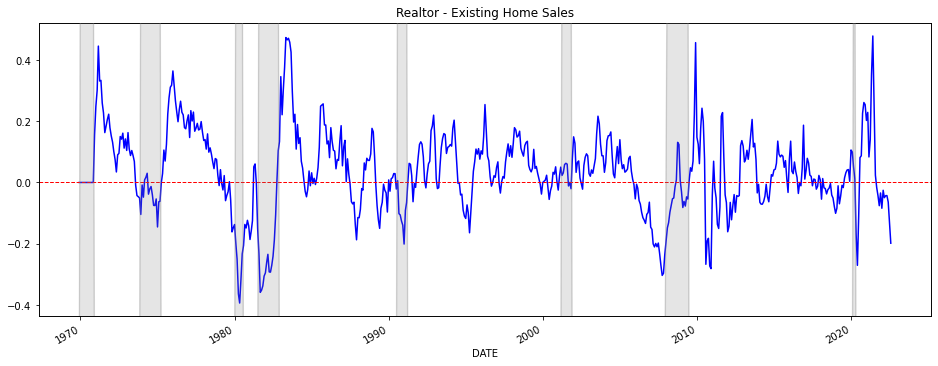

In [14]:
# Save copy for composite:
df4 = df
df4 = df4[['yoy']]

# Create Chart
fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()
df.iloc[:, 1].plot(kind='line', stacked=False, ax=ax0, color='blue')
df['USREC'].plot(kind='area', secondary_y=True, ax=ax1, alpha=.2, color='grey')
ax0.axhline(0,color='r',ls='--', label="0", lw=1)
plt.ylim(ymin=0.2, ymax=0.8)
plt.axis('off')
plt.title("Realtor - Existing Home Sales")
plt.ylabel("Nam")
plt.show()
plt.close()

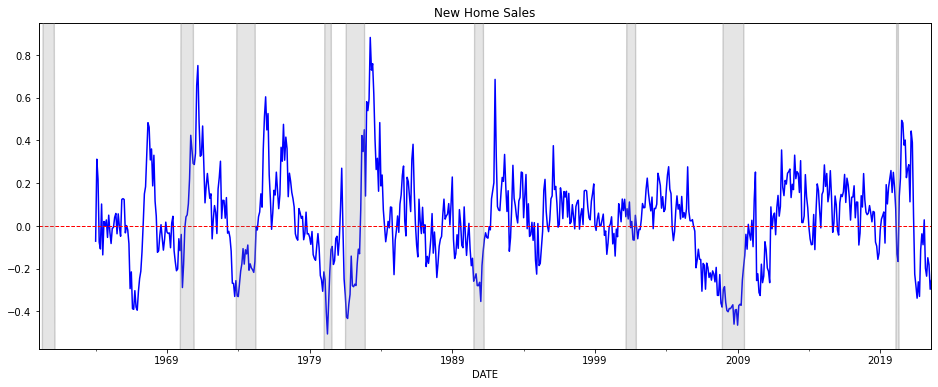

In [15]:
# Save API key in a variable
fred_api_key = '5ccedb95e2418de2e5b7bae928c4e406'

# Create a list of the necessary tickers
tickers = ['HSN1F', 'USREC']

# Download data from fred API
df = pdr.DataReader(tickers, 'fred', start='1960-01-01') 
df['HSN1F'] = df['HSN1F'].pct_change(12)

# Save copy for composite:
df4_a = df[['HSN1F']]

# Create Chart
fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()
df['HSN1F'].plot(kind='line', stacked=False, ax=ax0, color='blue')
df['USREC'].plot(kind='area', secondary_y=True, ax=ax1, alpha=.2, color='grey')
ax0.axhline(0,color='r',ls='--', label="0", lw=1)
plt.ylim(ymin=0.2, ymax=0.8)
plt.axis('off')
plt.title("New Home Sales")
plt.ylabel("Nam")
plt.show()
plt.close()

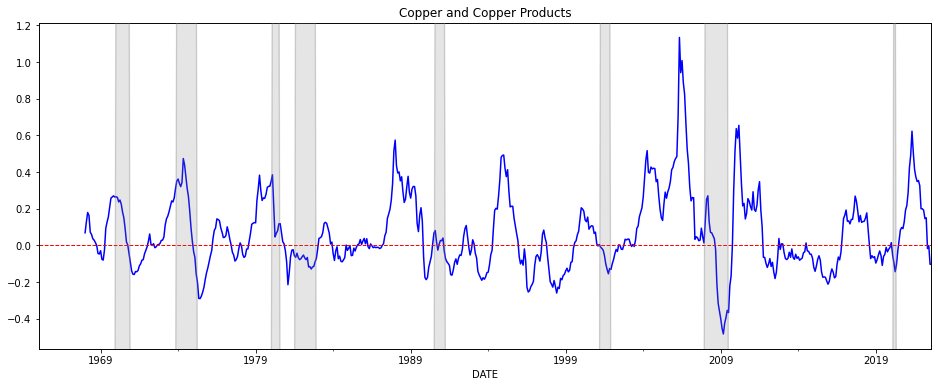

In [16]:
# Save API key in a variable
fred_api_key = '5ccedb95e2418de2e5b7bae928c4e406'

# Create a list of the necessary tickers
tickers = ['WPUSI019011', 'USREC']

# Download data from fred API
df = pdr.DataReader(tickers, 'fred', start='1965-01-01') 
df['WPUSI019011'] = df['WPUSI019011'].pct_change(12)

# Save copy for composite:
df4_b = df[['WPUSI019011']]

# Create Chart
fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()
df['WPUSI019011'].plot(kind='line', stacked=False, ax=ax0, color='blue')
df['USREC'].plot(kind='area', secondary_y=True, ax=ax1, alpha=.2, color='grey')
ax0.axhline(0,color='r',ls='--', label="0", lw=1)
plt.ylim(ymin=0.2, ymax=0.8)
plt.axis('off')
plt.title("Copper and Copper Products")
plt.show()
plt.close()

### 5) UNDEREMPLOYED OR SLACK - Leading Recession, Lagging Recovery

First Friday of the month at 8.30 am ET 

Bureau of Labour Statistic’s website slack/part-time/under-employment http://bps.gov - look for Employed Persons by Class of Work and Part-Time Status

Increases in underemployment 

The economy is weakening (strengthening)

Buy defensive stocks like pharma, food, alcohol (growth stocks)

Risk Level: Low to Medium

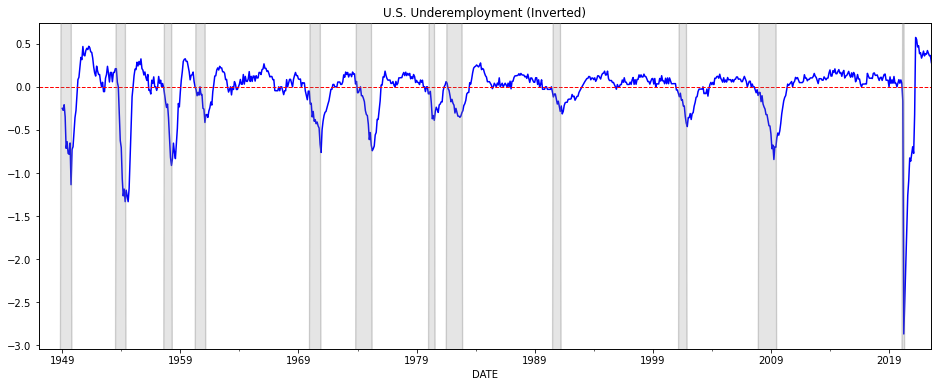

In [17]:
# Save API key in a variable
fred_api_key = '5ccedb95e2418de2e5b7bae928c4e406'

# Create a list of the necessary tickers
tickers = ['CIVPART', 'EMRATIO', 'USREC']

# Download data from fred API
df = pdr.DataReader(tickers, 'fred', start='1947-01-01')
df['UNDEREMP'] = df['CIVPART'] - df['EMRATIO']
df['YOY'] = df['UNDEREMP'].pct_change(12) * -1

# Save copy for composite:
df5 = df
df5 = df5[['YOY']]

# Create Chart
fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()
df['YOY'].plot(kind='line', stacked=False, ax=ax0, color='blue')
df['USREC'].plot(kind='area', secondary_y=True, ax=ax1, alpha=.2, color='grey')
ax0.axhline(0,color='r',ls='--', label="0", lw=1)
plt.ylim(ymin=0.2, ymax=0.8)
plt.axis('off')
plt.title("U.S. Underemployment (Inverted)")
plt.show()
plt.close()

### Bonus: Composite Consumption Indicators

Leading into Recessions, Coincident to Leading Recoveries.

Let's now build a regressive indicator that simply average all the above indicators into one composite.

Look for decreases in the composite indicator below 0
Consumption is deteriorating.

Avoid equities and increase risk off assets. 

In [18]:
composite = pd.concat([df1, df2_a, df3, df4, df4_a, df4_b, df5,], axis=1)

# Download data from fred API
df_rec = pdr.DataReader('USREC', 'fred', start=composite.index[0]) 
composite = pd.concat([composite, df_rec], axis=1)

# create list of column names to use later
col_names = list(composite.columns)
# create list of index column to use later
index = composite.index

# scale data
scaler = MinMaxScaler()
composite_scaled = scaler.fit_transform(composite)

# create scaled dataframe
composite_scaled = pd.DataFrame(composite_scaled, columns=col_names)
composite_scaled.index = index

# fill current month data with last value if not yet released
composite_scaled = composite_scaled.ffill(axis=0)

# filter data from 1967
composite_scaled = composite_scaled['1967-01-01':]

# build composite model
composite_index = composite_scaled.drop('USREC', axis=1).mean(axis=1)
composite_index_smoothed = composite_index.rolling(3).mean()

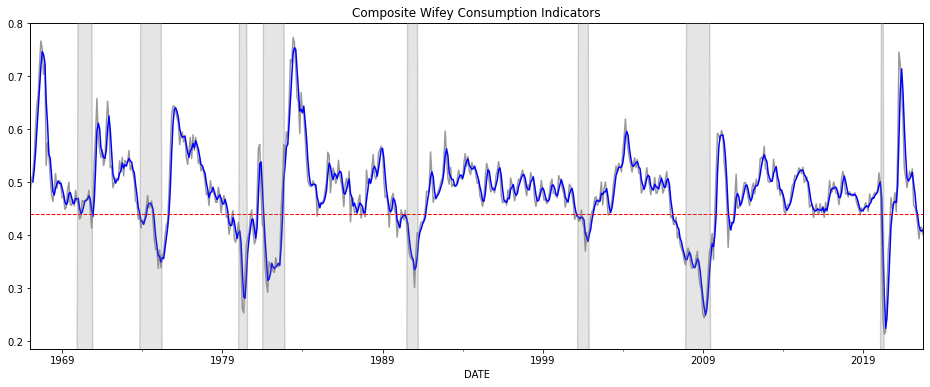

In [19]:
# Create Chart
fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()
composite_index.plot(kind='line', stacked=False, ax=ax0, alpha=.8, color='grey')
composite_index_smoothed.plot(kind='line', stacked=False, ax=ax0, color='blue')
composite_scaled['USREC'].plot(kind='area', secondary_y=True, ax=ax1, alpha=.2, color='grey')
ax0.axhline(0.44,color='r',ls='--', label="0", lw=1)
plt.ylim(ymin=0.2, ymax=0.8)
plt.axis('off')
plt.title("Composite Wifey Consumption Indicators")
plt.show()
plt.close()

## INVESTMENT (I)

### 6) BOOK-TO-BILL RATIO - leading

Middle of the month for previous month

Semiconductor Industry Association (SIA) publishes the book-to-bill ratio http://sia-online.org or http://semi.org

Increases (decreases) in the book-to-bill ratio above (below) 1.00

### 7) Copper Prices

Look everyday

London Metal Exchange (LME) http://lme.co.uk / http://kitcometals.com / World Bureau of Metal Statistics http://world-bureau.com / IMF Primary Commodity Prices http://imf.org/external/np/res/commod/index.asp

Increase (decrease) in copper prices, especially above $3 (below $2)- per pound

Housing and manufacturing are gearing up (slowing down)

If sure price movement is due to increase (decrease) in demand & not supply shock buy (sell) copper & manufacturing stocks.

Risk Level: High

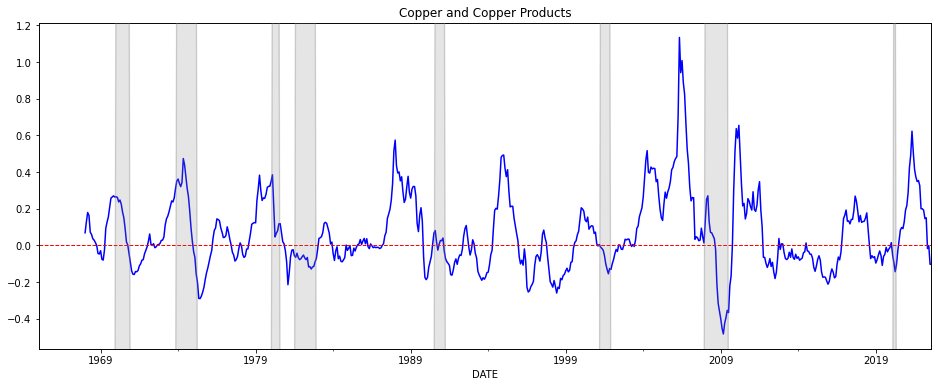

In [20]:
# Create a list of the necessary tickers
tickers = ['WPUSI019011', 'USREC']

# Download data from fred API
df = pdr.DataReader(tickers, 'fred', start='1965-01-01') 
df['WPUSI019011'] = df['WPUSI019011'].pct_change(12)

# Save copy for composite:
df7 = df[['WPUSI019011']]

# Create Chart
fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()
df['WPUSI019011'].plot(kind='line', stacked=False, ax=ax0, color='blue')
df['USREC'].plot(kind='area', secondary_y=True, ax=ax1, alpha=.2, color='grey')
ax0.axhline(0,color='r',ls='--', label="0", lw=1)
plt.ylim(ymin=0.2, ymax=0.8)
plt.axis('off')
plt.title("Copper and Copper Products")
plt.show()
plt.close()

### 8) DURABLE GOODS ORDERS - Leading

8.30am ET around 26th day of the month. Data covers month prior.

The US Census Bureau http://census.gov/manufacturing/m3/ Historical data http://census.gov/manufacturing/m3/historcial_data/index.html 

Increases (decreases) in durable goods orders, excl. defense and aircraft purchases 3m to 5m

The economy is likely to grow (shrink) in the near term

Go long (short) a braid basket of stocks. 

Risk Level: Medium to High

In [21]:
# Download data

df = pd.read_excel('https://www.census.gov/manufacturing/m3/historical_data/histshts/sic/nop.xls')

# Create dataframe for Durable Goods Total:

df.columns = ['ticker', 'year', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
df1 = df.loc[df['ticker'] == 'AMDMNO']
df1 = df1.drop('ticker', axis=1).set_index('year').stack().reset_index().rename(columns={'level_1': 'Month', 0: 'Total'})
df1['DATE'] = pd.to_datetime(df1[['year', 'Month']].assign(DAY=1))
df1 = df1.set_index('DATE')
df1.drop(df1.columns[[0,1]], axis=1, inplace=True)

df1['Total'] = df1['Total'].pct_change(12)
df_temp = df1

In [22]:
# Dowmload data

df = pd.read_excel('https://www.census.gov/manufacturing/m3/prel/historical_data/histshts/naics/naicsnop.xlsx')

# Create dataframe for Durable Goods Total:

df.columns = ['ticker', 'year', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
df1 = df.loc[df['ticker'] == 'AMDMNO']
df1 = df1.drop('ticker', axis=1).set_index('year').stack().reset_index().rename(columns={'level_1': 'Month', 0: 'Total'})
df1['DATE'] = pd.to_datetime(df1[['year', 'Month']].assign(DAY=1))
df1 = df1.set_index('DATE')
df1.drop(df1.columns[[0,1]], axis=1, inplace=True)

# Create dataframe for Durable Goods excl Defense:

df2 = df.loc[df['ticker'] == 'ADXDNO']
df2 = df2.drop('ticker', axis=1).set_index('year').stack().reset_index().rename(columns={'level_1': 'Month', 0: 'Ex Def'})
df2['DATE'] = pd.to_datetime(df2[['year', 'Month']].assign(DAY=1))
df2 = df2.set_index('DATE')
df2.drop(df2.columns[[0,1]], axis=1, inplace=True)

# Create dataframe for Durable Goods excl Aircraft:

df3 = df.loc[df['ticker'] == 'ADXTNO']
df3 = df3.drop('ticker', axis=1).set_index('year').stack().reset_index().rename(columns={'level_1': 'Month', 0: 'Ex Air'})
df3['DATE'] = pd.to_datetime(df3[['year', 'Month']].assign(DAY=1))
df3 = df3.set_index('DATE')
df3.drop(df3.columns[[0,1]], axis=1, inplace=True)

# Merge the 3 Dataframes

df = pd.concat([df1, df2, df3], axis=1)

df['Defense'] = df['Total'] - df['Ex Def']
df['Durable Goods'] = df['Ex Air'] - df['Defense']
#df['Durable Goods'] = df['Ex Air']

df['Durable Goods'] = df['Durable Goods'].pct_change(12)
df = df['Durable Goods']

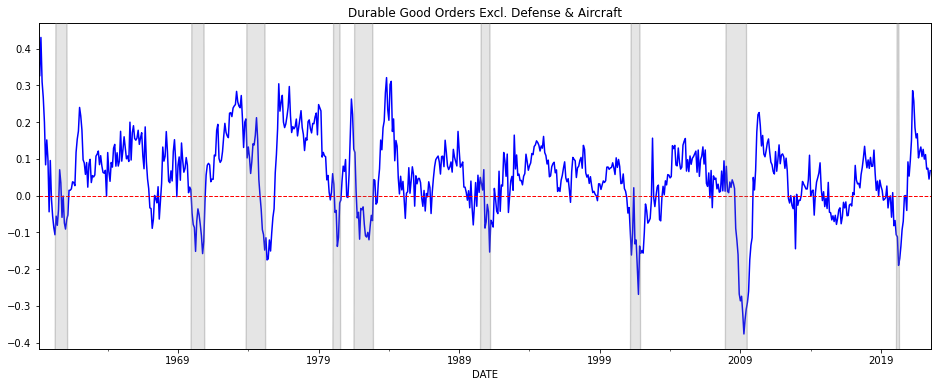

In [23]:
# Merge and create chart

df = pd.concat([df_temp, df], axis=1)
df['Durable Goods excl Defense & Aircraft'] = df.mean(axis=1)
df = df['Durable Goods excl Defense & Aircraft'].dropna()

# Download data from fred API

df_rec = pdr.DataReader('USREC', 'fred', start=df.index[0])

# Create Chart

fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()
df.plot(kind='line', stacked=False, ax=ax0, color='blue')
df_rec['USREC'].plot(kind='area', secondary_y=True, ax=ax1, alpha=.2, color='grey')
ax0.axhline(0,color='r',ls='--', label="0", lw=1)
plt.ylim(ymin=0.2, ymax=0.8)
plt.axis('off')
plt.title("Durable Good Orders Excl. Defense & Aircraft")
plt.show()
plt.close()

### 9) HOUSING PERMITS AND STARTS - Leading 

8.30am ET around 16th of the month. Data covers prior month. 

Census Bureau http://census.gov/comet/www/newresconstindex.html 

Increase (decreases) in building permits over several months

The economy is heating up (cooling down)

Buy (short) home-building stocks directly or an ETF like XHB 

Risk Level: Medium for ETF, High for stock singles

In [24]:
# Create a list of the necessary tickers
tickers = ['PERMIT', 'HOUST', 'USREC']

# Download data from fred API
df = pdr.DataReader(tickers, 'fred', start='1960-01-01')  

df['PERMIT'] = df['PERMIT'].pct_change(12)
df['HOUST'] = df['HOUST'].pct_change(12)

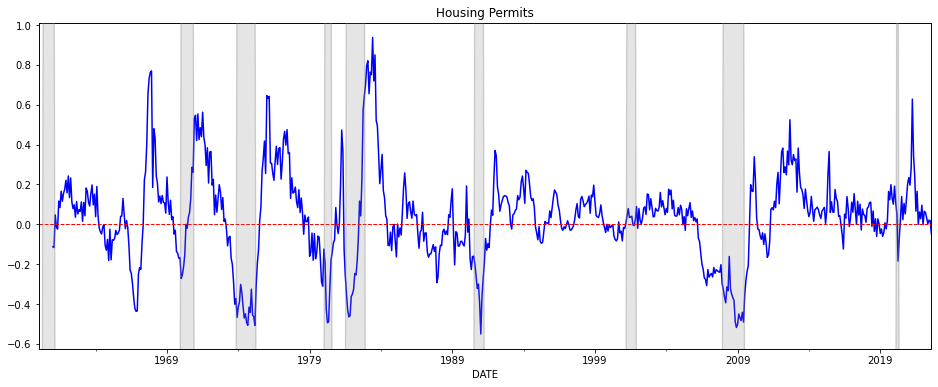

In [25]:
# Create Chart
fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()
df['PERMIT'].plot(kind='line', stacked=False, ax=ax0, color='blue')
df['USREC'].plot(kind='area', secondary_y=True, ax=ax1, alpha=.2, color='grey')
ax0.axhline(0,color='r',ls='--', label="0", lw=1)
plt.ylim(ymin=0.2, ymax=0.8)
plt.axis('off')
plt.title("Housing Permits")
plt.show()
plt.close()

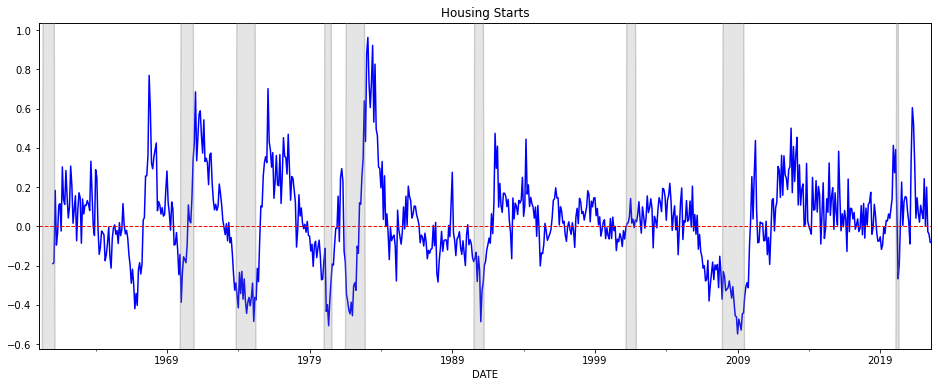

In [26]:
# Create Chart
fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()
df['HOUST'].plot(kind='line', stacked=False, ax=ax0, color='blue')
df['USREC'].plot(kind='area', secondary_y=True, ax=ax1, alpha=.2, color='grey')
ax0.axhline(0,color='r',ls='--', label="0", lw=1)
plt.ylim(ymin=0.2, ymax=0.8)
plt.axis('off')
plt.title("Housing Starts")
plt.show()
plt.close()

### 10) INDUSTRIAL PRODUCTION AND CAPACITY UTILISATION - Coincident, Leading

9.15am ET around 15th month

http://federalreserve.gov/releases/g17/current historical data http://federalreserve.gov/releases/g17/current/table11.htm 

Increases (declines) in capacity utilisation 

Business investment rising (falling) and so will economy

Buy (short) capital equipment suppliers like Fluor (FLR) or appropriate ETFs

Risk Level: Medium to High

In [27]:
# Create a list of the necessary tickers
tickers = ['TCU', 'USREC']

# Download data from fred API
df = pdr.DataReader(tickers, 'fred', start='1967-01-01')  

df['TCU'] = df['TCU'].pct_change(12)

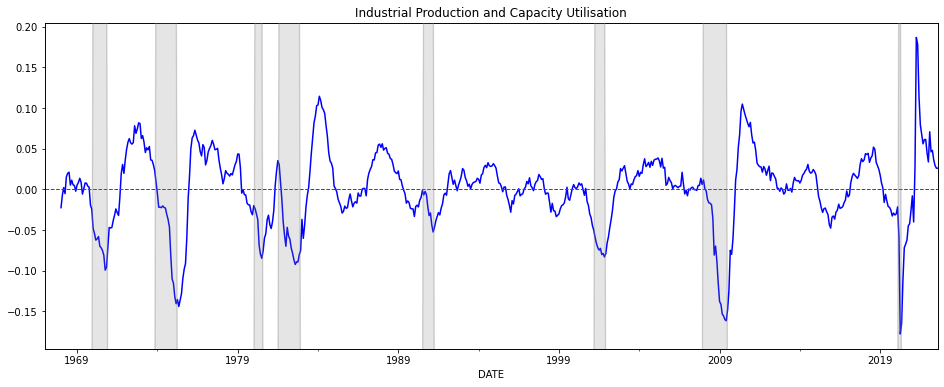

In [28]:
# Create Chart
fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()
df['TCU'].plot(kind='line', stacked=False, ax=ax0, color='blue')
df['USREC'].plot(kind='area', secondary_y=True, ax=ax1, alpha=.2, color='grey')
ax0.axhline(0,color='r',ls='--', label="0", lw=1)
plt.ylim(ymin=0.2, ymax=0.8)
plt.axis('off')
plt.title("Industrial Production and Capacity Utilisation")
plt.show()
plt.close()

### 11) INSTITUTE FOR SUPPLY MANAGEMENT (ISM) MANUFACTURING SURVEY - Leading

10am ET on 1st business day of month

Institute for Supply Management http://ism.ws 

Increases in PMI above 50

Manufacturing growing as so is economy

Long high beta stocks

Risk Level: High

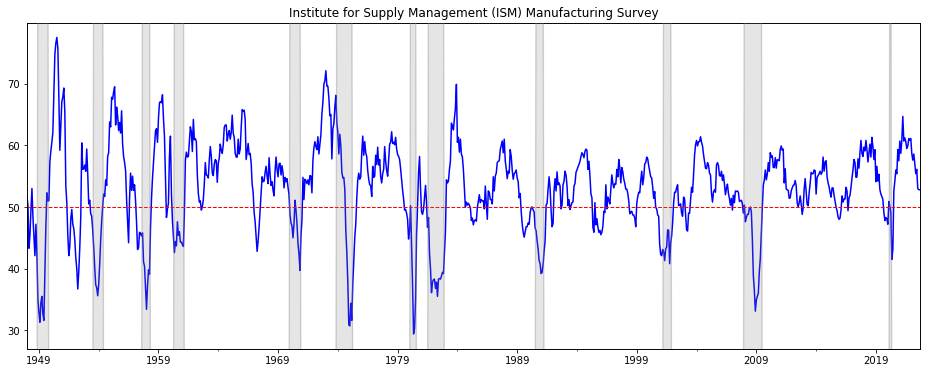

In [29]:
# load FRED recession dates as per NBER:
recession = 'USREC'
df_rec = pdr.DataReader(recession, 'fred', start='1948-01-01')

# load ISM Manufacturing PMI Data:
df_pmi = pd.read_csv('datasets/ISM_PMI.csv', parse_dates=True, index_col=0)
df_pmi = df_pmi.replace(to_replace=",", value=".", regex=True)
pmi_update_adress = 'https://api.db.nomics.world/v22/series/ISM/pmi.csv?limit=1000&q=&dimensions=%7B%7D'
df_pmi_update = pd.read_csv(pmi_update_adress,parse_dates=True, index_col=0)
df_pmi_update.index = df_pmi_update.index + pd.DateOffset(months=1)
df_pmi_update.rename(columns={'PMI (ISM/pmi/pm)': 'ISM_PMI'}, inplace=True)
df_pmi.rename(columns={'VALUE': 'ISM_PMI'}, inplace=True)
df_pmi_update = df_pmi_update.loc[(df_pmi.index[-1] + pd.offsets.MonthBegin(1)):]
df_pmi = df_pmi.append(df_pmi_update)
df_pmi.to_csv('datasets/ISM_PMI.csv')
df_ism_rec = df_pmi.join(df_rec['USREC'])
df_ism_rec['USREC'] = df_ism_rec['USREC'].fillna(0)
df_ism_rec['ISM_PMI'] = df_ism_rec['ISM_PMI'].astype(float)

# Create Chart
fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()
df_ism_rec['ISM_PMI'].plot(kind='line', stacked=False, ax=ax0, color='blue')
df_ism_rec['USREC'].plot(kind='area', secondary_y=True, ax=ax1, alpha=.2, color='grey')
ax0.axhline(50,color='r',ls='--', label="0", lw=1)
plt.ylim(ymin=0.2, ymax=0.8)
plt.axis('off')
plt.title("Institute for Supply Management (ISM) Manufacturing Survey")
plt.show()
plt.close()

### 12) INSTITUTE FOR SUPPLY MANAGEMENT (ISM) NON-MANUFACTURING SURVEY - Leading (also see ISM manufacturing survey)

3rd business day of the month at 10am ET

Institute for Supply Management http://ism.ws

Increases (decreases) in new orders and/or the headline figure above (below) level of 50

The service sector is growing (slowing) with the economy

Buy stocks (long bonds & cash) 

Risk Level: Low

In [30]:
df = pd.read_csv('downloads/ISM Non Manufacturing.csv', parse_dates=True, index_col=0)

In [31]:
# Download data from investing.com

from bs4 import BeautifulSoup

url = 'https://www.investing.com/economic-calendar/ism-non-manufacturing-pmi-176'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
table1 = soup.find('table', id='eventHistoryTable176')
headers = []
for i in table1.find_all('th'):
  title = i.text
  headers.append(title)

mydata = pd.DataFrame(columns = headers)
table_rows = table1.find_all('tr')

for j in table1.find_all('tr')[1:]:
  row_data = j.find_all('td')
  row = [i.text for i in row_data]
  length = len(mydata)
  mydata.loc[length] = row

In [32]:
# Format dataframe:

mydata.set_index('Release Date', inplace=True)
mydata.index = mydata.index.str.replace(r"\(.*?\)", "", regex=True)
mydata.index = pd.to_datetime(mydata.index)
mydata.index = mydata.index + pd.offsets.MonthBegin(-1)
mydata.index.names = ['DATE']
mydata['data'] = mydata['Previous'].shift(1)
mydata['ISM_NM'] = np.where(mydata['data'].isnull(), mydata['Actual'], mydata['data'])
mydata = mydata.dropna()
mydata['ISM_NM'] = mydata['ISM_NM'].astype(float)
mydata.drop(mydata.columns[[0,1,2,3,4,5]], axis=1, inplace=True)
mydata = mydata.sort_index(ascending=True)

In [33]:
# Merge 2 dataframes to get latest data and save new excel: 

df_update = mydata.loc[(df.index[-1] + pd.offsets.MonthBegin(1)):]
df = df.append(df_update)
df.to_csv('downloads/ISM Non Manufacturing.csv')

# Download data from fred API
df_rec = pdr.DataReader('USREC', 'fred', start=df.index[0]) 
df = df.join(df_rec['USREC'])
df = df.fillna(0)

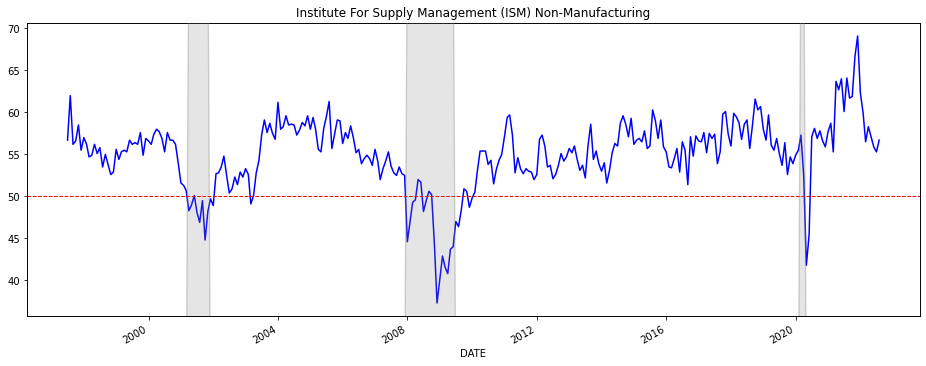

In [34]:
# Create Chart
fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()
df.iloc[:, 0].plot(kind='line', stacked=False, ax=ax0, color='blue')
df['USREC'].plot(kind='area', secondary_y=True, ax=ax1, alpha=.2, color='grey')
ax0.axhline(50,color='r',ls='--', label="0", lw=1)
plt.ylim(ymin=0.2, ymax=0.8)
plt.axis('off')
plt.title("Institute For Supply Management (ISM) Non-Manufacturing")
plt.ylabel("Nam")
plt.show()
plt.close()

### 13) JoC-ECRI INDUSTRIAL PRICE INDEX - Leading (see Copper Price) 

Look weekly

ECRI provides up to date JoC-ECRI IPI for free / also see http://BusinessCycle.com/news/press 

The 3 Ps (pronounced and persistent movement in the index driven by large or pervasive number of industrial commods

The overall economy is about to soar (has peaked and falling)

Buy (sell) industrial stocks

Risk Level: High

### 14) LONDON METAL EXCHANGES INVENTORIES - leading (see Copper Price, ISM manufacturing survey)

Every business day

LME http://lme.co.uk // COMEX http://cmegroup.com // The Shanghai Futures Exchange http://shfe.com.cn 

Increases or decreases in inventories of different types of metals

Look for increases / decreases in Chinese demand and relative health of manufacturing sector (see purchasing managers indexes)

Low (high) inventories signal booming (stagnating) sector

Inventories high (low) avoid stocks (buy stocks)

Risk Level: High

### 15) PERSONAL SAVINGS RATE - coincident

8:30am ET 4 weeks after the month - “Personal Income and Outlays” report from Commerce Department

US Bureau of Economic Analysis http://bea.gov/national/index.htm#personal // FRED database

Increases (decreases) in the saving rate Consumers are probably pretty jittery (feeling confident)

If the saving rate is trending upward then it’s likely the consumption part of economy will be weak. Avoid stocks of consumer-driven companies.

Risk Level: Medium

In [35]:
# Create a list of the necessary tickers
tickers = ['PSAVERT', 'USREC']

# Download data from fred API
df = pdr.DataReader(tickers, 'fred', start='1960-01-01')  

df['PSAVERT'] = df['PSAVERT'].pct_change(12)

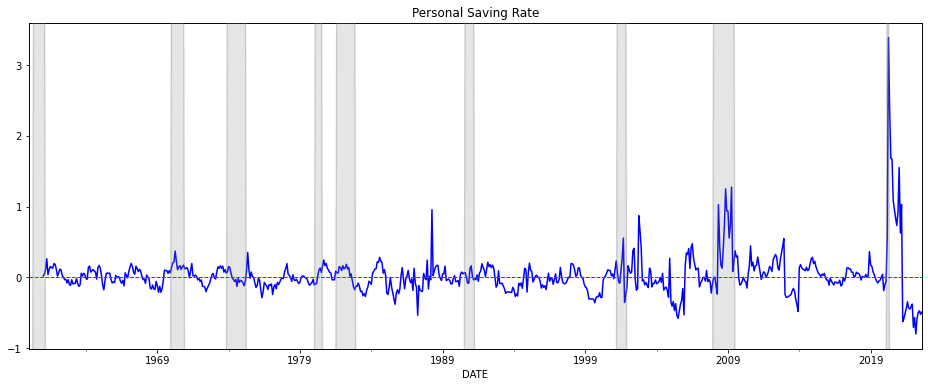

In [36]:
# Create Chart
fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()
df['PSAVERT'].plot(kind='line', stacked=False, ax=ax0, color='blue')
df['USREC'].plot(kind='area', secondary_y=True, ax=ax1, alpha=.2, color='grey')
ax0.axhline(0,color='r',ls='--', label="0", lw=1)
plt.ylim(ymin=0.2, ymax=0.8)
plt.axis('off')
plt.title("Personal Saving Rate")
plt.show()
plt.close()

### 16) UNIT LABOUR COSTS - coincident (see also ISM manufacturing survey, Philadelphia Fed: Business Outlook survey)

Data published 8.30am ET near start of the month - comes out Feb, May, August & Nov. 

US Bureau of Labour Statistics http://bls.gov/bls/newsrels.htm

Look for “Productivity and Costs” news release

Changes in unit labour productively

Depends on where the business cycle is. Higher labour costs during recession might signal a recovery or a nasty inflation

Recession - safe haven
Inflation - TIPS & Gold

Risk Level: Low to high

In [37]:
# Create a list of the necessary tickers
tickers = ['ULCNFB', 'USREC']

# Download data from fred API
df = pdr.DataReader(tickers, 'fred', start='1948-01-01')  

df['ULCNFB'] = df['ULCNFB'].pct_change(12)

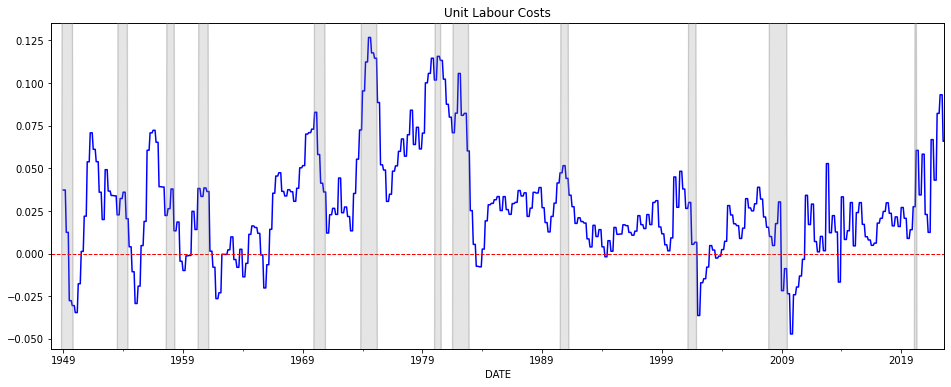

In [38]:
# Create Chart
fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()
df['ULCNFB'].plot(kind='line', stacked=False, ax=ax0, color='blue')
df['USREC'].plot(kind='area', secondary_y=True, ax=ax1, alpha=.2, color='grey')
ax0.axhline(0,color='r',ls='--', label="0", lw=1)
plt.ylim(ymin=0.2, ymax=0.8)
plt.axis('off')
plt.title("Unit Labour Costs")
plt.show()
plt.close()

## GOVERNMENT (G)

### 17) FEDERAL GOVERNMENT BUDGET DEFICITS AND THE NATIONAL DEBT - coincident to leading

2pm ET on the 8th business day of each month / see US Debt Clock http://usdebtclock.org 

http://fms.treas.gov/mts/index.html you need to annualise the data then compare to GDP / FRED database

research.stlouisfed.org/fred2/series/FYFSD?cid=5 / http://whitehouse.gov/omb/budget/

Increases (decreases) in the national debt as % GDP

The Gov incentive to cause inflation is increasing (decreasing)

Short (buy) Government bonds and buy (short) gold 

Risk Level: High

In [39]:
# Create a list of the necessary tickers
tickers = ['FYFSGDA188S', 'USREC']

# Download data from fred API
df = pdr.DataReader(tickers, 'fred', start='1929-01-01')
df = df.fillna(method="ffill")

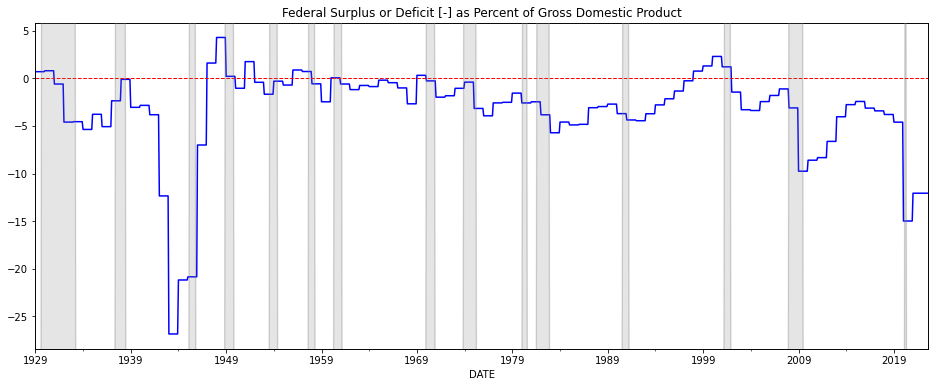

In [40]:
# Create Chart
fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()
df['FYFSGDA188S'].plot(kind='line', stacked=False, ax=ax0, color='blue')
df['USREC'].plot(kind='area', secondary_y=True, ax=ax1, alpha=.2, color='grey')
ax0.axhline(0,color='r',ls='--', label="0", lw=1)
plt.ylim(ymin=0.2, ymax=0.8)
plt.axis('off')
plt.title("Federal Surplus or Deficit [-] as Percent of Gross Domestic Product")
plt.show()
plt.close()

In [41]:
# Create a list of the necessary tickers
tickers = ['FYGFGDQ188S', 'USREC']

# Download data from fred API
df = pdr.DataReader(tickers, 'fred', start='1970-01-01')  

df['FYGFGDQ188S'] = df['FYGFGDQ188S'].pct_change(12)

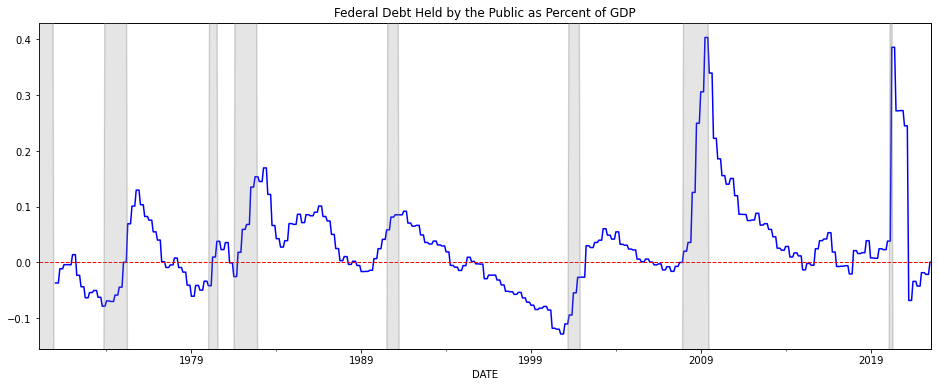

In [42]:
# Create Chart
fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()
df['FYGFGDQ188S'].plot(kind='line', stacked=False, ax=ax0, color='blue')
df['USREC'].plot(kind='area', secondary_y=True, ax=ax1, alpha=.2, color='grey')
ax0.axhline(0,color='r',ls='--', label="0", lw=1)
plt.ylim(ymin=0.2, ymax=0.8)
plt.axis('off')
plt.title("Federal Debt Held by the Public as Percent of GDP")
plt.show()
plt.close()

## NET EXPORTS (NX)

### 18) BALTIC DRY INDEX - leading

Each business day

http://balticexchange.com / http://investmenttools.com/futures/bdi_baltic_dry_index.htm 

Increase (decrease) in the BDI

Increased (decreased) demand for raw materials used in manufacturing 

Buy (short) dry bulk shipping companies 

Risk Level: Medium

In [43]:
df = pd.read_excel('downloads/Baltic Dry Index.xls', parse_dates=True, index_col=0)

<AxesSubplot:xlabel='Date'>

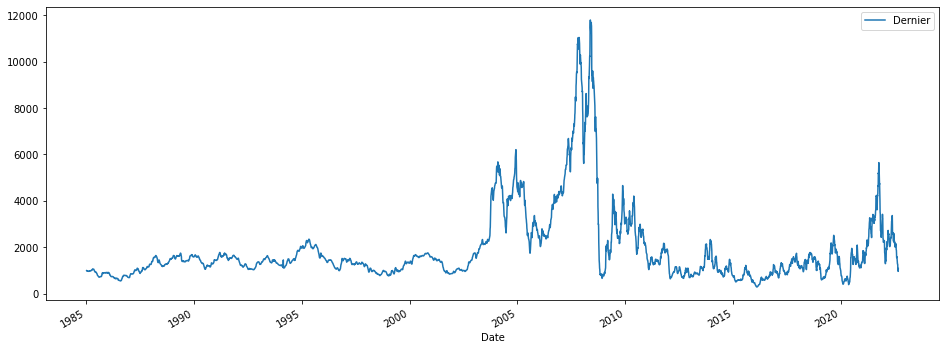

In [44]:
df.plot()

### 19) BIG MAC INDEX - leading 

Weekly on Fridays when Economist is published

http://economist.com

Countries where Big Mac’s cost significantly less (more) in dollar terms over USA

The local currency is undervalued (overvalued) and hence likely to appreciate (depreciate) in long-term

Buy (short) undervalued (overvalued) currencies

Risk Level: Astronomical

### 20) CURRENT ACCOUNT DEFICIT- leading (also see TIC data)

Once per quarter at 8.30am ET in the middle of the month (March, June, Sept, Dec)

FRED database St.Louis Fed

Trade deficits > 5% of GDP (ex USA)

Exchange rate crisis may loom

Short currency 

Risk Level: Astronomical

In [45]:
# Create a list of the necessary tickers
tickers = ['NETFI', 'GDP', 'USREC']

# Download data from fred API
df = pdr.DataReader(tickers, 'fred', start='1947-01-01')


df['Deficit to GDP'] = df['NETFI'] / df['GDP'] * 100
df = df.dropna()

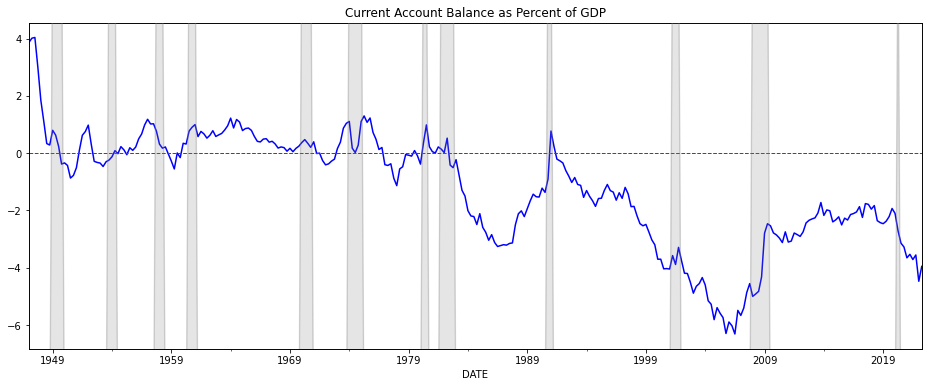

In [46]:
# Create Chart
fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()
df['Deficit to GDP'].plot(kind='line', stacked=False, ax=ax0, color='blue')
df['USREC'].plot(kind='area', secondary_y=True, ax=ax1, alpha=.2, color='grey')
ax0.axhline(0,color='r',ls='--', label="0", lw=1)
plt.ylim(ymin=0.2, ymax=0.8)
plt.axis('off')
plt.title("Current Account Balance as Percent of GDP")
plt.show()
plt.close()

### 21) OIL INVENTORIES - leading

10.30am ET weekly on Wed

EIA Petroleum Status Report http://EIA.gov 

Increases (decreases) in oil inventories (not counting gov strategic reserves)

Demand weak (strong) due to economy

Buy (sell) energy & industrials

Risk level: Medium

In [47]:
df = pd.read_excel('https://www.eia.gov/dnav/pet/hist_xls/WCESTUS1w.xls', sheet_name=-1, header=None)
df.drop(index=df.index[:2], axis=0, inplace=True)
df, df.columns = df[1:] , df.iloc[0]
df = df.set_index('Date')
df.columns = ['Oil Inventories']
df['Oil Inventories Change'] = df['Oil Inventories'].diff()

<AxesSubplot:xlabel='Date'>

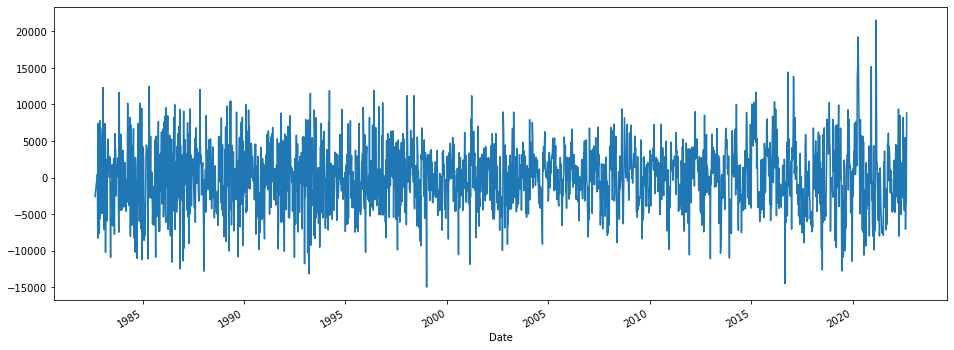

In [48]:
df['Oil Inventories Change'].plot()

### 22) TANKAN SURVEY - leading 

April, July, Oct & mid Dec at 8.30am Japanese time 

Bank of Japan http://boj.or.jp/en/type/stat/boj_stat/tk/index.htm 

Japan Industrial Production report http://meti.go.jp/english/statistics

The Japanese economy is going to grow (shrink) soon, regardless of what government says

Buy (sell) Japanese stocks / ETFs with Japan exposure

Risk Level: High

In [49]:
df = pd.read_csv('downloads/Tankan.csv', parse_dates=True, index_col=0)

In [50]:
# Download data from investing.com

from bs4 import BeautifulSoup

url = 'https://www.investing.com/economic-calendar/reuters-tankan-index-1509'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
table1 = soup.find('table', id='eventHistoryTable1509')
headers = []
for i in table1.find_all('th'):
  title = i.text
  headers.append(title)

mydata = pd.DataFrame(columns = headers)
table_rows = table1.find_all('tr')

for j in table1.find_all('tr')[1:]:
  row_data = j.find_all('td')
  row = [i.text for i in row_data]
  length = len(mydata)
  mydata.loc[length] = row

In [51]:
# Format dataframe:

mydata.set_index('Release Date', inplace=True)
mydata.index = mydata.index.str.replace(r"\(.*?\)", "", regex=True)
mydata.index = pd.to_datetime(mydata.index)
mydata.index = mydata.index + pd.offsets.MonthBegin(-1)
mydata.index.names = ['DATE']
mydata['data'] = mydata['Previous'].shift(1)
mydata['Tankan'] = np.where(mydata['data'].isnull(), mydata['Actual'], mydata['data'])
mydata = mydata.dropna()
mydata['Tankan'] = mydata['Tankan'].astype(float)
mydata.drop(mydata.columns[[0,1,2,3,4,5]], axis=1, inplace=True)
mydata = mydata.sort_index(ascending=True)

In [52]:
# Merge 2 dataframes to get latest data and save new excel: 

df_update = mydata.loc[(df.index[-1] + pd.offsets.MonthBegin(1)):]
df = df.append(df_update)
df.to_csv('downloads/Tankan.csv')

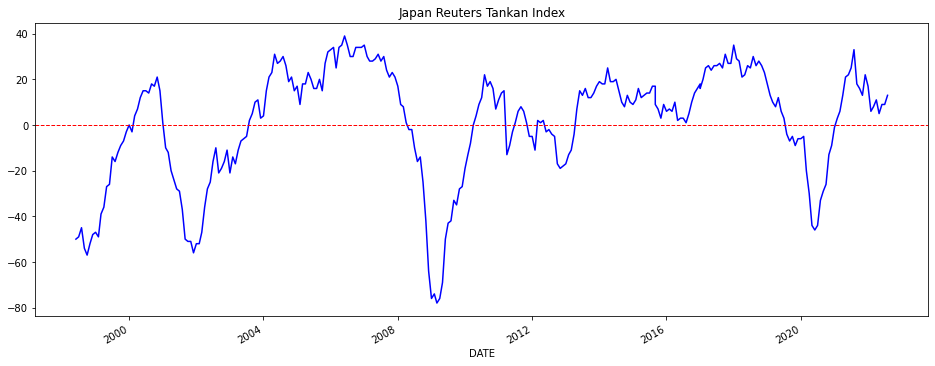

In [53]:
# Create Chart
fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()
df.iloc[:, 0].plot(kind='line', stacked=False, ax=ax0, color='blue')
ax0.axhline(0,color='r',ls='--', label="0", lw=1)
plt.axis('off')
plt.title("Japan Reuters Tankan Index")
plt.ylabel("Nam")
plt.show()
plt.close()

In [54]:
# Create a list of the necessary tickers
tickers = ['JPNPROINDMISMEI', 'USREC']

# Download data from fred API
df = pdr.DataReader(tickers, 'fred', start='1961-01-01')  

df['JPNPROINDMISMEI'] = df['JPNPROINDMISMEI'].pct_change(12)

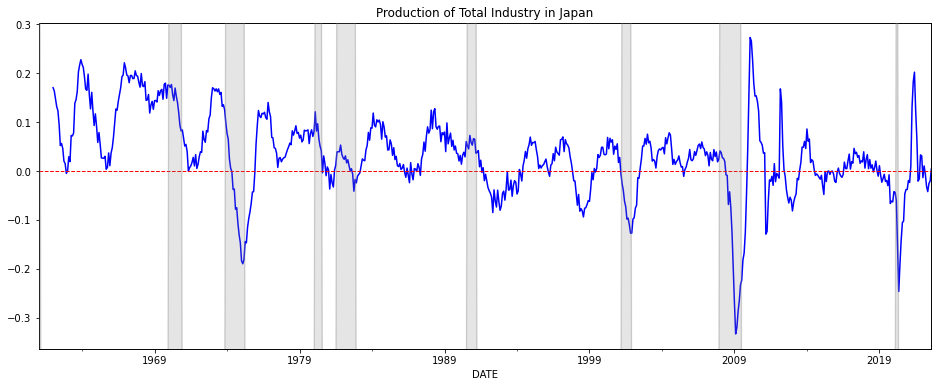

In [55]:
# Create Chart
fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()
df['JPNPROINDMISMEI'].plot(kind='line', stacked=False, ax=ax0, color='blue')
df['USREC'].plot(kind='area', secondary_y=True, ax=ax1, alpha=.2, color='grey')
ax0.axhline(0,color='r',ls='--', label="0", lw=1)
plt.ylim(ymin=0.2, ymax=0.8)
plt.axis('off')
plt.title("Production of Total Industry in Japan")
plt.show()
plt.close()

### 23) TIC DATA - leading (see Current Account Deficit, Federal Deficit) 

TIC data is released 9am ET middle of the month for flows taking place a month and a half earlier

TIC data from US Treasury Department http://treas.gov/tic/ / IMF http://imf.org/external/data.htm

Increases (decreases) in foreign demand for US securities

Pressure on interest rates will be downward (upward) 

Watch for additional signs of interest rate movements - buy (sell) fixed income if rates are heading down (up) 

Risk Level: Medium

In [56]:
df = pd.read_csv("https://treasury.gov/resource-center/data-chart-center/tic/Documents/npr_history.csv")

<AxesSubplot:xlabel='Unnamed: 0'>

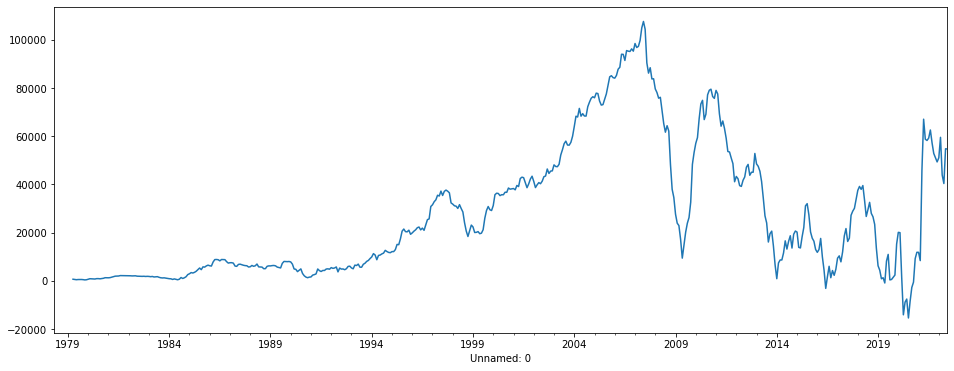

In [57]:
update_df = df.dropna()
update_df = update_df.iloc[2:, :]
update_df.index = update_df.iloc[:, 0]
update_df.index = pd.to_datetime(update_df.index)
data = update_df.iloc[:, 3]
data.sort_index().astype(float).rolling(12).mean().plot()